In [3]:
%pip install tensorflow keras;

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import tensorflow as tf
import random

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import cm
import os 
import shutil
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [5]:

# Define paths
data_dir = 'data/'
train_dir = 'train/'
test_dir = 'test/'

# Clear train and test directories
shutil.rmtree(train_dir, ignore_errors=True)
shutil.rmtree(test_dir, ignore_errors=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get list of image filenames in each class folder
malignant_images = os.listdir(os.path.join(data_dir, 'malignant'))
normal_images = os.listdir(os.path.join(data_dir, 'normal'))

# Shuffle the filenames
random.shuffle(malignant_images)
random.shuffle(normal_images)

# Define the number of images for training and testing
train_count = 200
test_count = 50

# Split images into training and testing sets
malignant_train_images = malignant_images[:train_count]
malignant_test_images = malignant_images[train_count:train_count+test_count]

normal_train_images = normal_images[:train_count]
normal_test_images = normal_images[train_count:train_count+test_count]

# Copy images to train and test folders
for img in malignant_train_images:
    src = os.path.join(data_dir, 'malignant', img)
    dst_train = os.path.join(train_dir, 'malignant', img)
    os.makedirs(os.path.dirname(dst_train), exist_ok=True)  # Create destination directory if it doesn't exist
    shutil.copyfile(src, dst_train)

for img in malignant_test_images:
    src = os.path.join(data_dir, 'malignant', img)
    dst_test = os.path.join(test_dir, 'malignant', img)
    os.makedirs(os.path.dirname(dst_test), exist_ok=True)  # Create destination directory if it doesn't exist
    shutil.copyfile(src, dst_test)

for img in normal_train_images:
    src = os.path.join(data_dir, 'normal', img)
    dst_train = os.path.join(train_dir, 'normal', img)
    os.makedirs(os.path.dirname(dst_train), exist_ok=True)  # Create destination directory if it doesn't exist
    shutil.copyfile(src, dst_train)

for img in normal_test_images:
    src = os.path.join(data_dir, 'normal', img)
    dst_test = os.path.join(test_dir, 'normal', img)
    os.makedirs(os.path.dirname(dst_test), exist_ok=True)  # Create destination directory if it doesn't exist
    shutil.copyfile(src, dst_test)

print("Data copied successfully.")

Data copied successfully.


In [6]:

# Define directories
train_dir = 'train/'
test_dir = 'test/'

# Count number of files in train directory
train_malignant_count = len(os.listdir(os.path.join(train_dir, 'malignant')))
train_normal_count = len(os.listdir(os.path.join(train_dir, 'normal')))

# Count number of files in test directory
test_malignant_count = len(os.listdir(os.path.join(test_dir, 'malignant')))
test_normal_count = len(os.listdir(os.path.join(test_dir, 'normal')))

# Print counts
print("Train directory:")
print(f"Malignant: {train_malignant_count} images")
print(f"Normal: {train_normal_count} images")

print("\nTest directory:")
print(f"Malignant: {test_malignant_count} images")
print(f"Normal: {test_normal_count} images")


Train directory:
Malignant: 200 images
Normal: 200 images

Test directory:
Malignant: 50 images
Normal: 50 images


In [7]:
# Define image dimensions and other parameters
img_height = 128
img_width = 128
epochs = 10

# Create ImageDataGenerators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=400,
    class_mode='binary',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=100,
    class_mode='binary',
    shuffle=False)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
import tensorflow as tf

# Define the model architecture
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


# Create an instance of the model
model = create_model(input_shape=(img_height, img_width, 3))

model.summary()

# Fit the model
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=train_generator, verbose=2)  

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


C:\Users\maham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\Users\maham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 - 54s - 54s/step - accuracy: 0.4100 - loss: 0.6902 - val_accuracy: 0.5000 - val_loss: 1.7130
Epoch 2/10
1/1 - 28s - 28s/step - accuracy: 0.5000 - loss: 1.7130 - val_accuracy: 0.5000 - val_loss: 0.6406
Epoch 3/10
1/1 - 12s - 12s/step - accuracy: 0.5000 - loss: 0.6406 - val_accuracy: 0.5225 - val_loss: 0.6475
Epoch 4/10
1/1 - 20s - 20s/step - accuracy: 0.5225 - loss: 0.6475 - val_accuracy: 0.7475 - val_loss: 0.6565
Epoch 5/10
1/1 - 8s - 8s/step - accuracy: 0.7475 - loss: 0.6565 - val_accuracy: 0.5225 - val_loss: 0.6215
Epoch 6/10
1/1 - 7s - 7s/step - accuracy: 0.5225 - loss: 0.6215 - val_accuracy: 0.4975 - val_loss: 0.5685
Epoch 7/10
1/1 - 19s - 19s/step - accuracy: 0.4975 - loss: 0.5685 - val_accuracy: 0.7375 - val_loss: 0.6333
Epoch 8/10
1/1 - 8s - 8s/step - accuracy: 0.7375 - loss: 0.6333 - val_accuracy: 0.7325 - val_loss: 0.5383
Epoch 9/10
1/1 - 20s - 20s/step - accuracy: 0.7325 - loss: 0.5383 - val_accuracy: 0.7675 - val_loss: 0.5326
Epoch 10/10
1/1 - 8s - 8s/step - accuracy: 0.

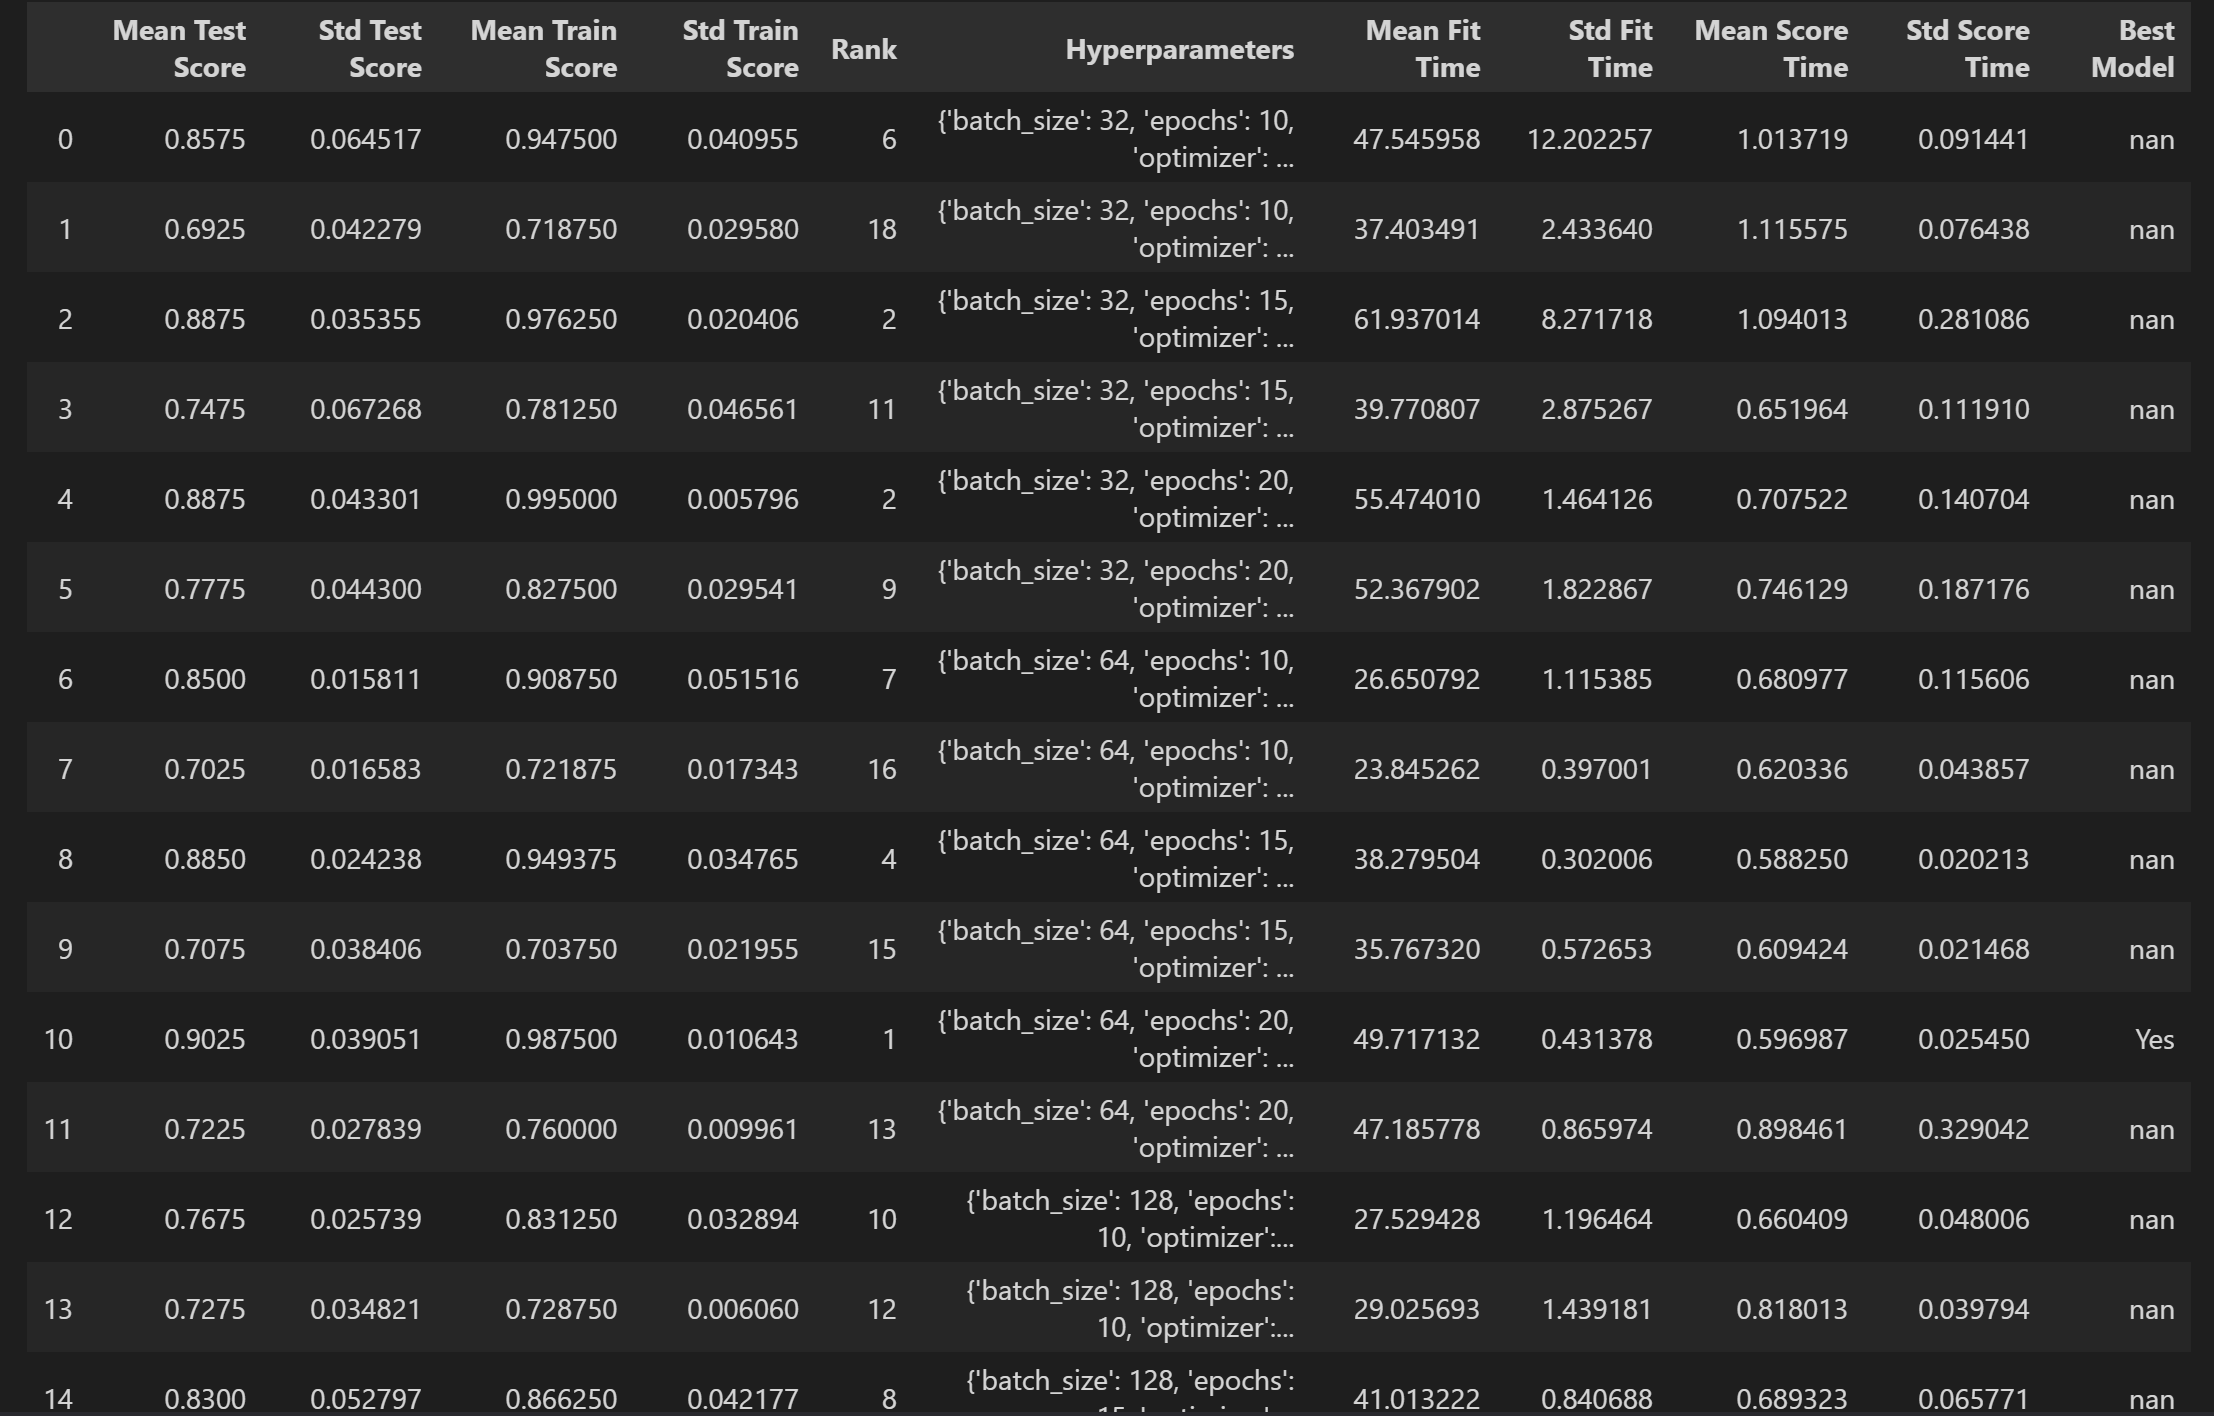
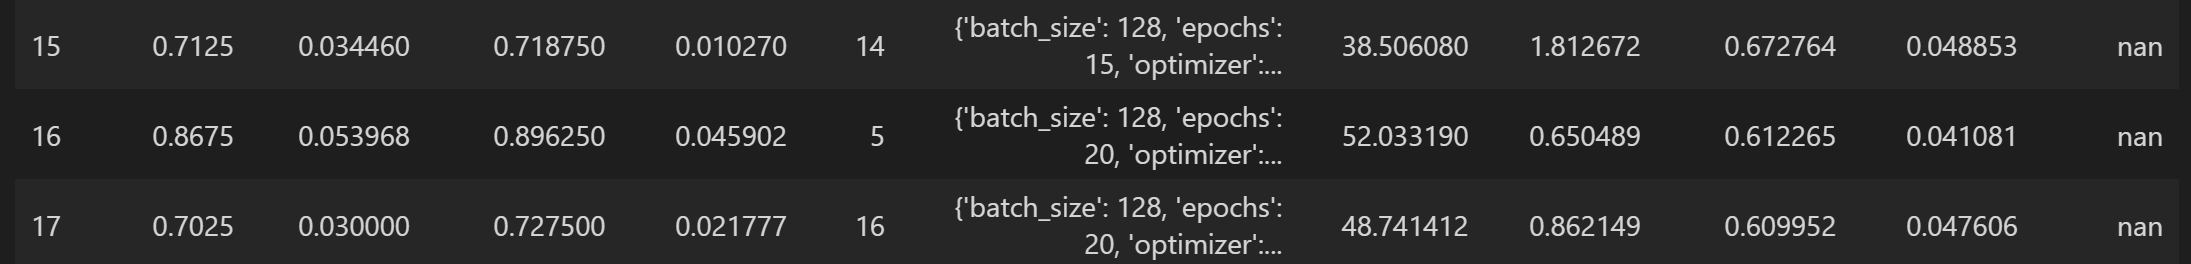

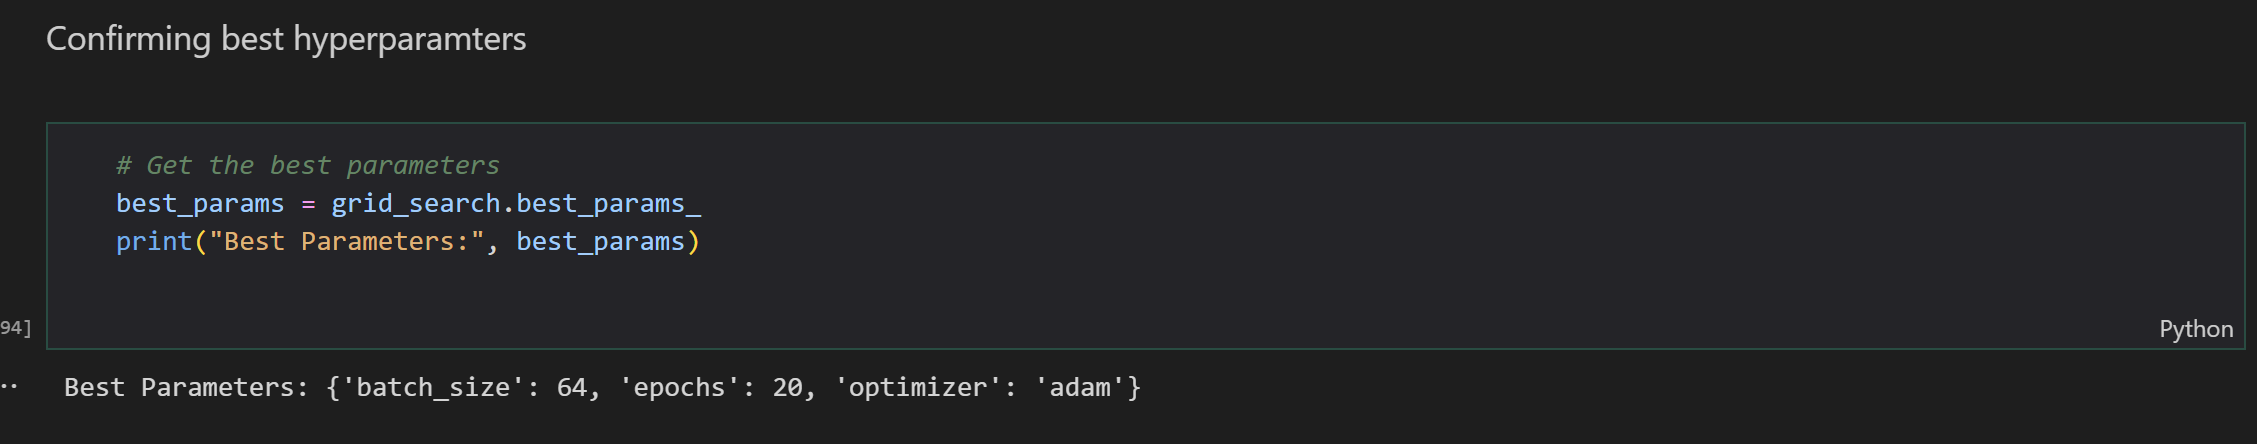

In [9]:
import tensorflow as tf

# Define the model architecture
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


# Create an instance of the model
model = create_model(input_shape=(img_height, img_width, 3))

model.summary()

# Fit the model
history = model.fit(train_generator, epochs=20, batch_size=64, validation_data=train_generator, verbose=2)  

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 - 17s - 17s/step - accuracy: 0.4150 - loss: 0.6866 - val_accuracy: 0.5000 - val_loss: 1.7122
Epoch 2/20
1/1 - 18s - 18s/step - accuracy: 0.5000 - loss: 1.7122 - val_accuracy: 0.5000 - val_loss: 0.6465
Epoch 3/20
1/1 - 7s - 7s/step - accuracy: 0.5000 - loss: 0.6465 - val_accuracy: 0.7600 - val_loss: 0.6528
Epoch 4/20
1/1 - 12s - 12s/step - accuracy: 0.7600 - loss: 0.6528 - val_accuracy: 0.5250 - val_loss: 0.6424
Epoch 5/20
1/1 - 16s - 16s/step - accuracy: 0.5250 - loss: 0.6424 - val_accuracy: 0.5000 - val_loss: 0.6066
Epoch 6/20
1/1 - 7s - 7s/step - accuracy: 0.5000 - loss: 0.6066 - val_accuracy: 0.5000 - val_loss: 0.5703
Epoch 7/20
1/1 - 18s - 18s/step - accuracy: 0.5000 - loss: 0.5703 - val_accuracy: 0.7400 - val_loss: 0.5438
Epoch 8/20
1/1 - 9s - 9s/step - accuracy: 0.7400 - loss: 0.5438 - val_accuracy: 0.7475 - val_loss: 0.5293
Epoch 9/20
1/1 - 7s - 7s/step - accuracy: 0.7475 - loss: 0.5293 - val_accuracy: 0.7550 - val_loss: 0.5211
Epoch 10/20
1/1 - 23s - 23s/step - a

In [10]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5062276721000671
Test accuracy: 0.7799999713897705


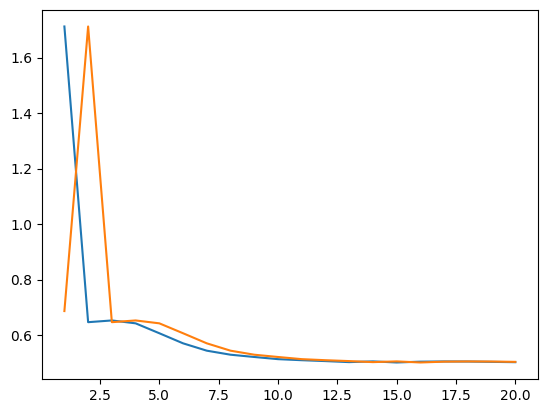

In [11]:
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1, len(vy) + 1))  # Adjust x to represent the range of epochs


plt.plot(x, vy)
plt.plot(x, ty)
plt.show()


In [13]:

# Evaluate the model on the train set
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Accuracy:", train_accuracy)

# Make predictions on the train set
train_predictions = model.predict(train_generator)
y_train_pred = np.where(train_predictions > 0.5, 1, 0)  # Thresholding the predictions for binary classification

# Get true labels for the train set
true_train_labels = train_generator.classes

# Print classification report for train data
print("Classification Report (Train Data):")
print(classification_report(true_train_labels, y_train_pred))

# Print accuracy for train data
accuracy_train = accuracy_score(true_train_labels, y_train_pred)
print("Accuracy (Train Data):", accuracy_train)

# Calculate confusion matrix for train data
conf_matrix_train = confusion_matrix(true_train_labels, y_train_pred)

# Calculate true positives, false negatives, true negatives, and false positives for train data
tp_train = conf_matrix_train[1, 1]
fn_train = conf_matrix_train[1, 0]
tn_train = conf_matrix_train[0, 0]
fp_train = conf_matrix_train[0, 1]

# Calculate sensitivity (true positive rate) and specificity (true negative rate) for train data
sensitivity_train = tp_train / (tp_train + fn_train)
specificity_train = tn_train / (tn_train + fp_train)

# Print sensitivity and specificity for train data
print("Sensitivity (Train Data):", sensitivity_train)
print("Specificity (Train Data):", specificity_train)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("\nTest Accuracy:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(test_generator)
y_test_pred = np.where(test_predictions > 0.5, 1, 0)  # Thresholding the predictions for binary classification

# Get true labels for the test set
true_test_labels = test_generator.classes

# Print classification report for test data
print("Classification Report (Test Data):")
print(classification_report(true_test_labels, y_test_pred))

# Print accuracy for test data
accuracy_test = accuracy_score(true_test_labels, y_test_pred)
print("Accuracy (Test Data):", accuracy_test)

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(true_test_labels, y_test_pred)

# Calculate true positives, false negatives, true negatives, and false positives for test data
tp_test = conf_matrix_test[1, 1]
fn_test = conf_matrix_test[1, 0]
tn_test = conf_matrix_test[0, 0]
fp_test = conf_matrix_test[0, 1]

# Calculate sensitivity (true positive rate) and specificity (true negative rate) for test data
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Print sensitivity and specificity for test data
print("Sensitivity (Test Data):", sensitivity_test)
print("Specificity (Test Data):", specificity_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7800 - loss: 0.5024
Train Accuracy: 0.7799999713897705
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       200
           1       0.69      1.00      0.82       200

    accuracy                           0.78       400
   macro avg       0.85      0.78      0.77       400
weighted avg       0.85      0.78      0.77       400

Accuracy (Train Data): 0.78
Sensitivity (Train Data): 1.0
Specificity (Train Data): 0.56
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 0.7800 - loss: 0.5062

Test Accuracy: 0.7799999713897705
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        50
           1       0.69      1.00      0.82        50

    accuracy                           0.78       100
   macr

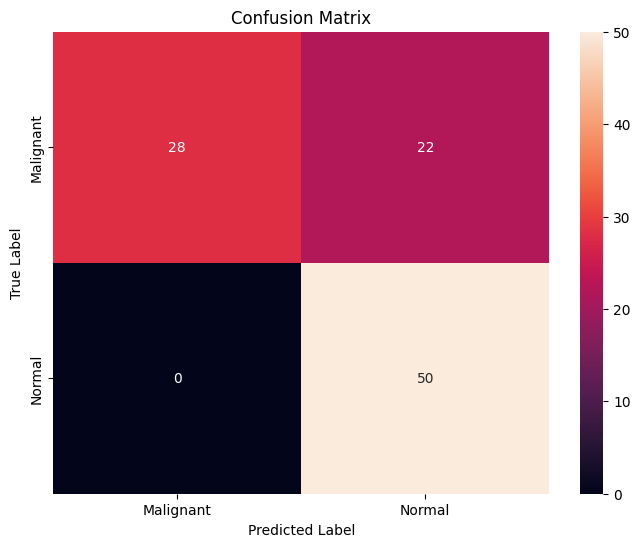

In [15]:
classes = ['Malignant', 'Normal']

# Compute confusion matrix
conf_matrix = confusion_matrix(true_test_labels, y_test_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
